In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy.linalg import inv

In [24]:
mvn = stats.multivariate_normal

def cond(mu, Sigma, x, observed):
    mu = np.array(mu)
    Sigma = np.array(Sigma)
    unobserved = np.delete(range(len(mu)), observed)
    mu1 = mu[unobserved]
    mu2 = mu[observed]
    x2 = np.array(x)[observed]
    invSigma22 = inv(Sigma[observed, observed])
    Sigma11 = Sigma[unobserved, unobserved]
    Sigma12 = Sigma[unobserved, observed]
    Sigma21 = Sigma12.T
    mu = mu1 + Sigma12.dot(invSigma22).dot(x2 - mu2)
    Sigma = Sigma11 - Sigma12.dot(invSigma22).dot(Sigma21)
    return mvn(mu, Sigma)

def marg(mu, Sigma, i):
    mu = np.array(mu)[i]
    Sigma = np.array(Sigma)[i, i]
    return mvn(mu, Sigma)

mu = [3, 4, 5]
Sigma = [[1, 0.5, 0.5], [0.5, 18, 0.5], [0.5, 0.5, 23]]

marg(mu, Sigma, [0, 1]).rvs()
cond(mu, Sigma, [2, 2, np.nan], [0, 1]).rvs()

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [2]:
D = 100
N = 10

In [6]:
observed = stats.randint.rvs(1, D - 2, size = N)
unobserved = np.delete(range(D), observed)
x = np.empty(D)
x[observed] = stats.norm.rvs(0, 5, N)

In [19]:
L = np.zeros((D - 2, D))

for i in range(D - 2):
    j = i
    L[i, j] = -0.5
    L[i, j + 1] = 1
    L[i, j + 2] = -0.5
    
L1 = L[:, unobserved]
L2 = L[:, observed]

lmbda = 2
L = lmbda * np.hstack([L1, L2])

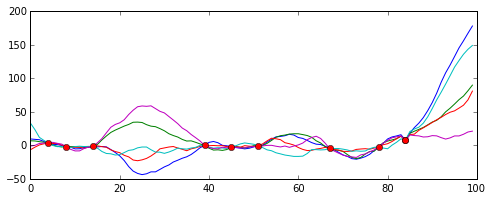

In [20]:
Sigma = inv(L1.T.dot(L1))
mu = -Sigma.dot(L1.T).dot(L2).dot(x[observed])
plt.figure(figsize = (8, 3))
for _ in range(5):
    x[unobserved] = stats.multivariate_normal.rvs(mu, Sigma)
    plt.plot(x)
plt.plot(observed, x[observed], 'ro')
plt.show()